# Composing multi-panelled plots

One topic that people often find challenging when building plots with Python, is building plots with multiple panels. We'll have a look at how to do this using some of the automated options available in Seaborn, and then will look at how to apply more fine-grained control using Matplotlib and other libraries.

> There are many different ways to approach building a multi-panel figure, and the best way to prepare yourself to be able to build any and all figures is to become used to reading the documentation. For every plot we make, find the relevant documentation page (in the API reference of the library) and compare the docstring to the way we use the functions.

### Seaborn faceted plots

Seaborn is fantastic at quickly building multi-panelled plots. Lets loadd in our old friend, the penguin dataset, and start plotting.

In [1]:
# import libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# load in our data
data = sns.load_dataset("penguins")

### Seaborn pairplot

The pairplot function is a *figure level* plot which will create a matrix of scatterplots of all the parameters, with a histogram down the central diagonal.

See documentation [here](https://seaborn.pydata.org/examples/scatterplot_matrix.html)

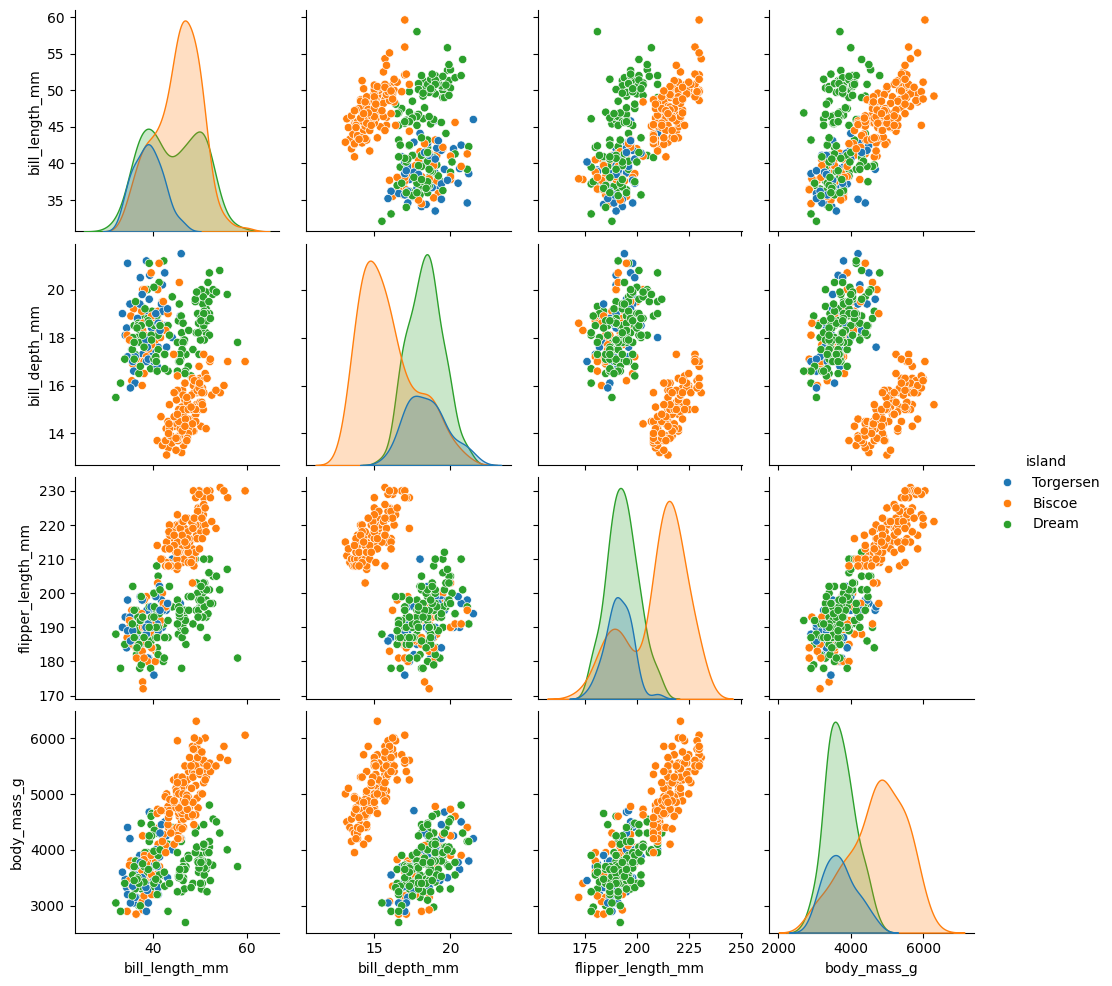

In [3]:
# using the defaults, hue="island"


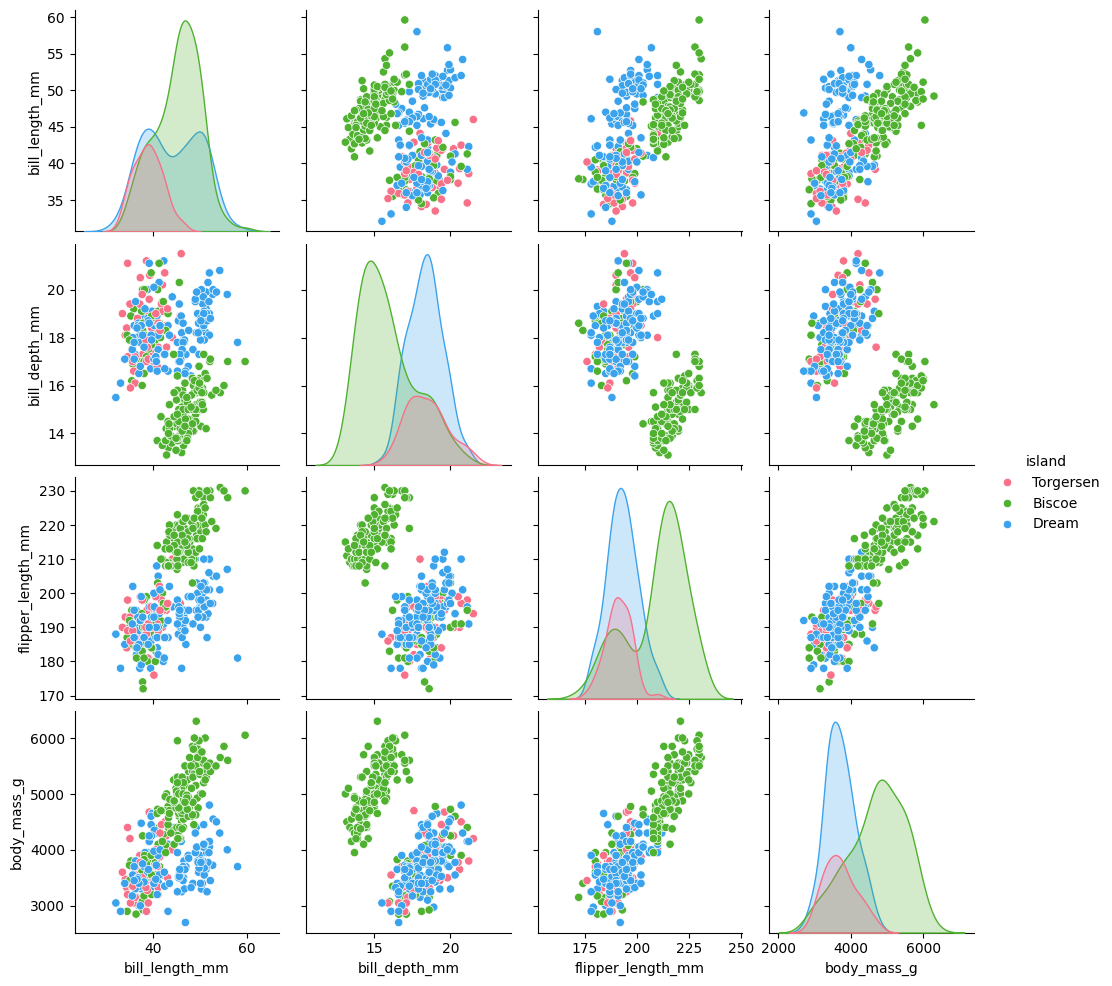

In [4]:
#change the palette


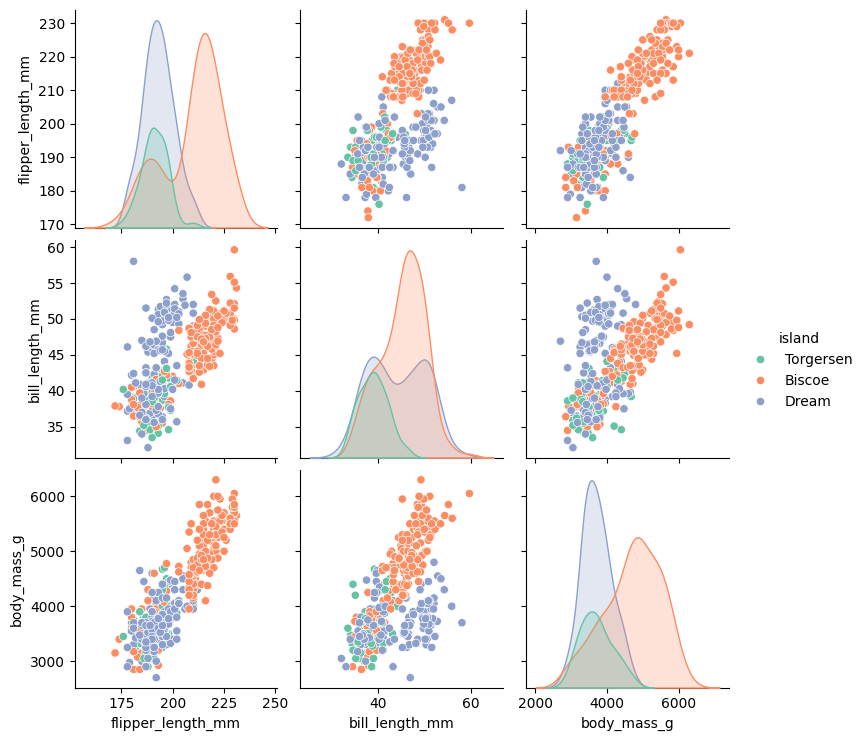

In [5]:
# select a subset of the data
sns.pairplot(
    data[["flipper_length_mm", "bill_length_mm", "body_mass_g", "island"]],
    hue="island", palette=)

#### Use a custom colour palette

In the introduction section, we discussed different places to find good colour palettes for scientific plotting, like [ColorBrewer](https://colorbrewer2.org/).

We can easily incorporate these palettes into our work by copying the hex code of the colours into a list.


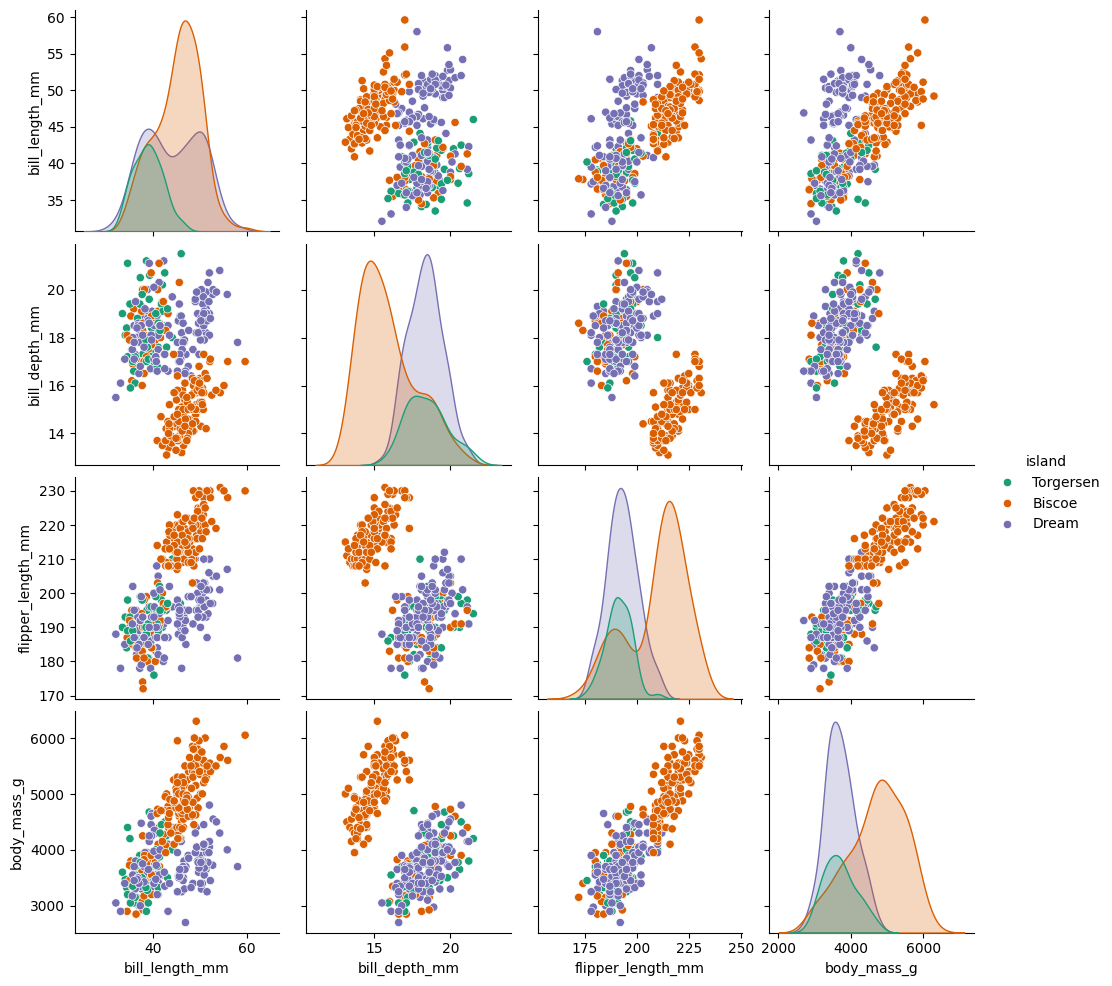

In [6]:
custom_pal = ["#1b9e77", "#d95f02", "#7570b3"]

sns.pairplot(
    data,
    hue="island",
    palette=)

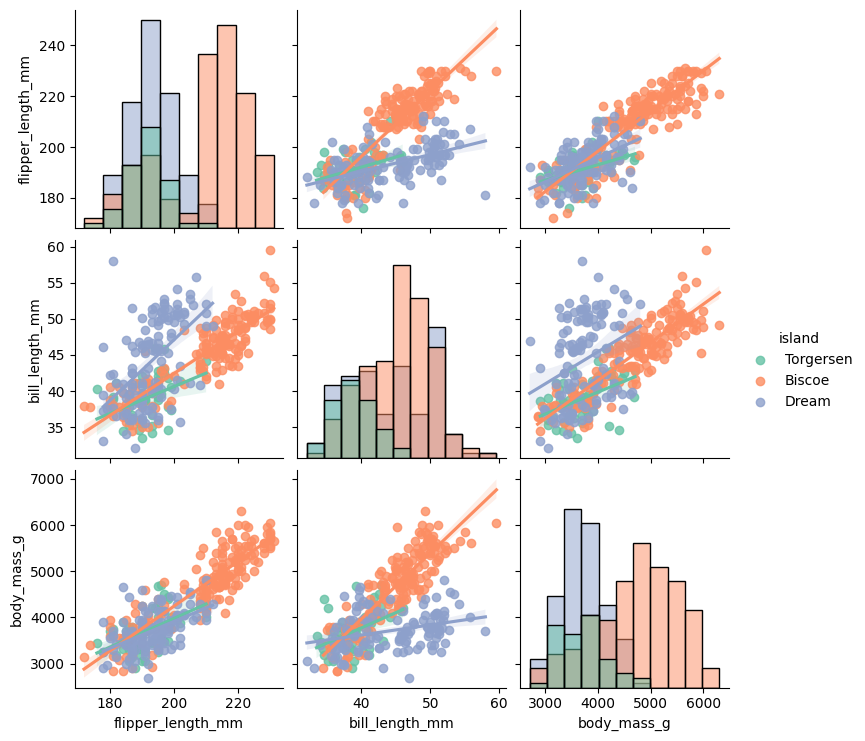

In [8]:
# we can change the plot types being used with the keywords
# "kind" and "diag_kind"
# https://seaborn.pydata.org/generated/seaborn.pairplot.html

sns.pairplot(
    data[["flipper_length_mm", "bill_length_mm", "body_mass_g", "island"]],
    hue="island", palette="Set2",
    kind="reg", diag_kind="hist")

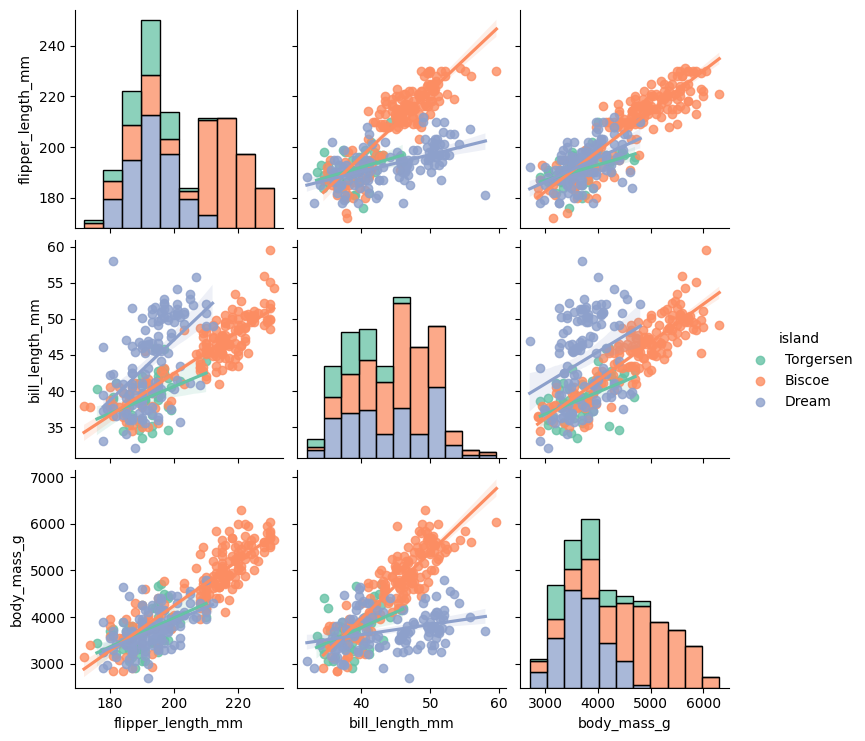

In [10]:
# we can change the plot types being used with the keywords
# "kind" and "diag_kind"
# https://seaborn.pydata.org/generated/seaborn.pairplot.html

# we can pass keyword arguments to control the individual plot types


sns.pairplot(
    data[["flipper_length_mm", "bill_length_mm", "body_mass_g", "island"]],
    hue="island", palette="Set2",
    kind="reg", diag_kind="hist",
    diag_kws={"multiple":"stack"})

### Seaborn jointplot

- [Jointplot documentation](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

Again, this is a high-level figure function.

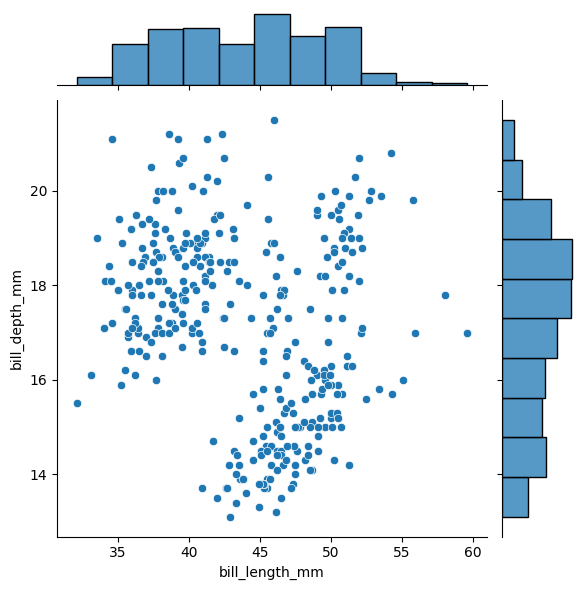

In [11]:
# we can call this plot in a single line
# x="bill_length_mm", y="bill_depth_mm"

sns.jointplot

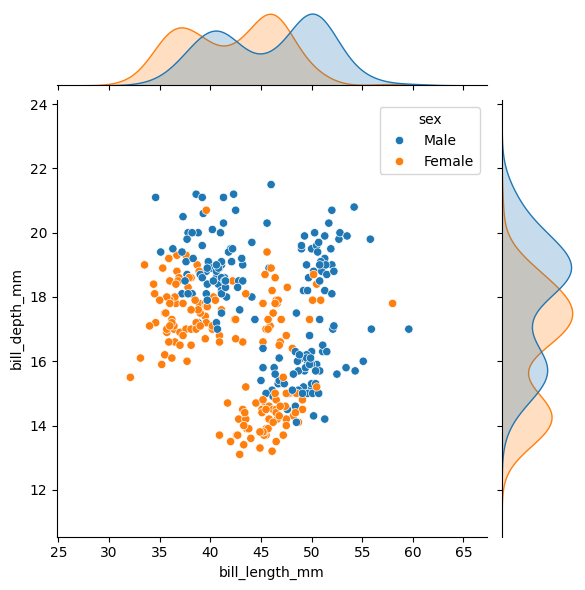

In [12]:
# We can add further dimensions using "hue"
sns.jointplot(...
              hue="sex")

# note that seaborn automatically updates the type of marginal plot being shown

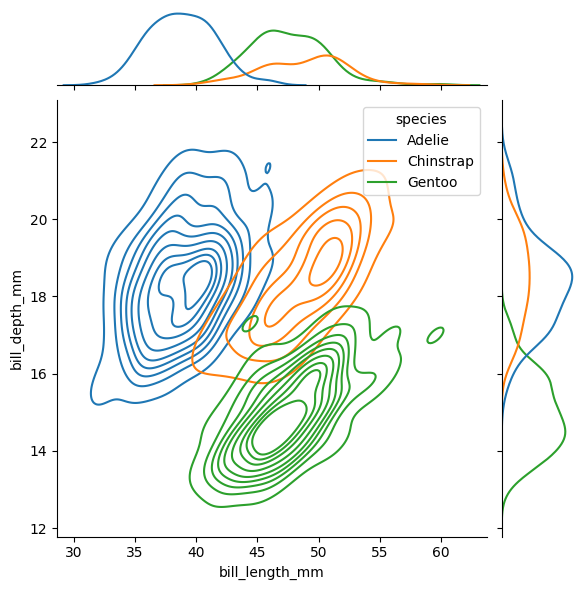

In [15]:
# We can change the "kind" of plot
sns.jointplot(...
              kind="kde")

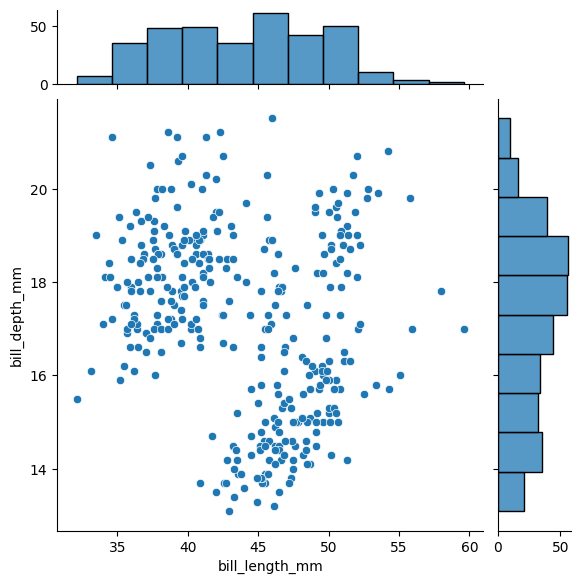

In [18]:
# we can add axis ticks to the marginal plot

sns.jointplot(...
              marginal_ticks=True)

You can control the specific plots being shown in more detail using the "facet grid" function [see documentation and examples here](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html), but we are going to move on to look at more fine-grained control with basic matplotlib.

## Matplotlib subplots

The subplot function is one of the most basic ways of creating a multi-panelled plot with fine-grained control.


[Try out this gridded plot builder here](https://quick-subplots.streamlit.app/)

We'll start off using some very basic data, just to build a grid of plots.



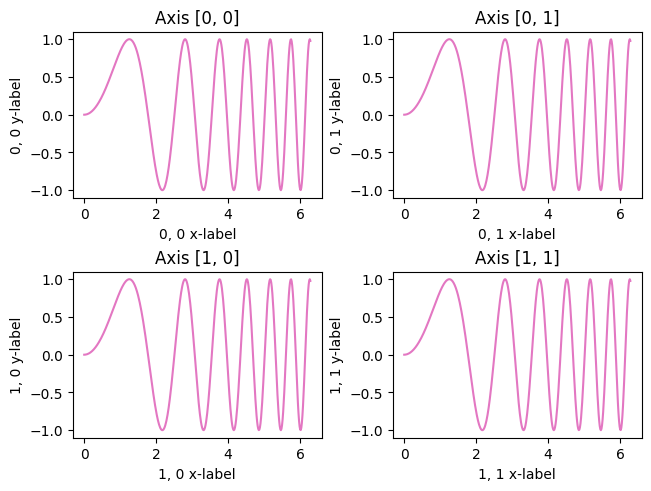

In [19]:
# copied across from https://quick-subplots.streamlit.app/

# n.b. I often keep the ax titles set until I am finished making the plot,
# even if I don't want to use them in the fional plot, to help me locate
# which part of the grid I'm working on

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# Set up figure with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, constrained_layout=True, sharex=False, sharey=False)

axs[0, 0].plot(x, y, 'tab:pink')
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 0].set(xlabel='0, 0 x-label', ylabel='0, 0 y-label')

axs[0, 1].plot(x, y, 'tab:pink')
axs[0, 1].set_title('Axis [0, 1]')
axs[0, 1].set(xlabel='0, 1 x-label', ylabel='0, 1 y-label')

axs[1, 0].plot(x, y, 'tab:pink')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 0].set(xlabel='1, 0 x-label', ylabel='1, 0 y-label')

axs[1, 1].plot(x, y, 'tab:pink')
axs[1, 1].set_title('Axis [1, 1]')
axs[1, 1].set(xlabel='1, 1 x-label', ylabel='1, 1 y-label')


[Text(0.5, 0, '1, 1 x-label'), Text(0, 0.5, '1, 1 y-label')]

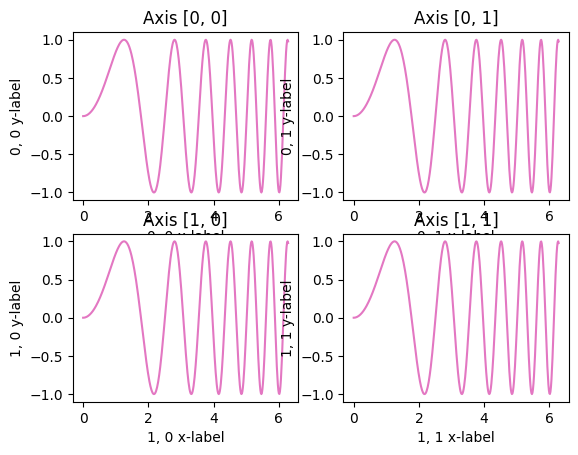

In [31]:
# what happens when we remove the following options:
# constrained_layout=True, sharex=False, sharey=False

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# Set up figure with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2,)

axs[0, 0].plot(x, y, 'tab:pink')
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 0].set(xlabel='0, 0 x-label', ylabel='0, 0 y-label')

axs[0, 1].plot(x, y, 'tab:pink')
axs[0, 1].set_title('Axis [0, 1]')
axs[0, 1].set(xlabel='0, 1 x-label', ylabel='0, 1 y-label')

axs[1, 0].plot(x, y, 'tab:pink')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 0].set(xlabel='1, 0 x-label', ylabel='1, 0 y-label')

axs[1, 1].plot(x, y, 'tab:pink')
axs[1, 1].set_title('Axis [1, 1]')
axs[1, 1].set(xlabel='1, 1 x-label', ylabel='1, 1 y-label')

[Text(0.5, 0, '1, 1 x-label'), Text(0, 0.5, '1, 1 y-label')]

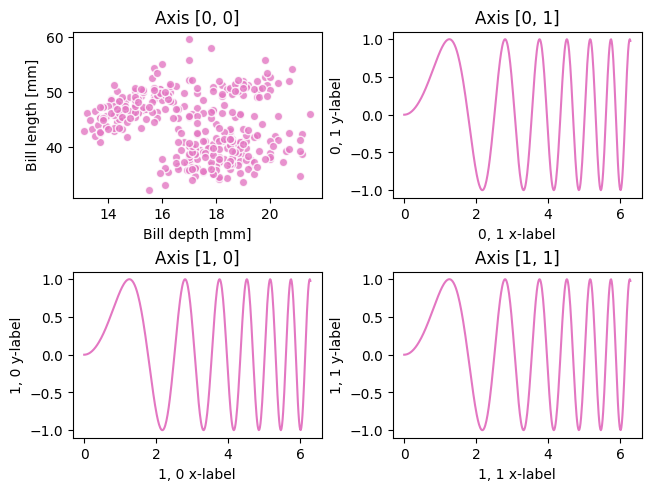

In [33]:

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# Set up figure with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, constrained_layout=True, )

# we can create a scatter plot in one panel
axs[0, 0].scatter(data['bill_depth_mm'],
                  data['bill_length_mm'],
                  c='tab:pink', edgecolors="white", alpha=0.8)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 0].set(xlabel='Bill depth [mm]', ylabel='Bill length [mm]')

axs[0, 1].plot(x, y, 'tab:pink')
axs[0, 1].set_title('Axis [0, 1]')
axs[0, 1].set(xlabel='0, 1 x-label', ylabel='0, 1 y-label')

axs[1, 0].plot(x, y, 'tab:pink')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 0].set(xlabel='1, 0 x-label', ylabel='1, 0 y-label')

axs[1, 1].plot(x, y, 'tab:pink')
axs[1, 1].set_title('Axis [1, 1]')
axs[1, 1].set(xlabel='1, 1 x-label', ylabel='1, 1 y-label')

Let's add a histogram using the matplotlib function plt.hist - see the [documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

[Text(0.5, 0, '1, 1 x-label'), Text(0, 0.5, '1, 1 y-label')]

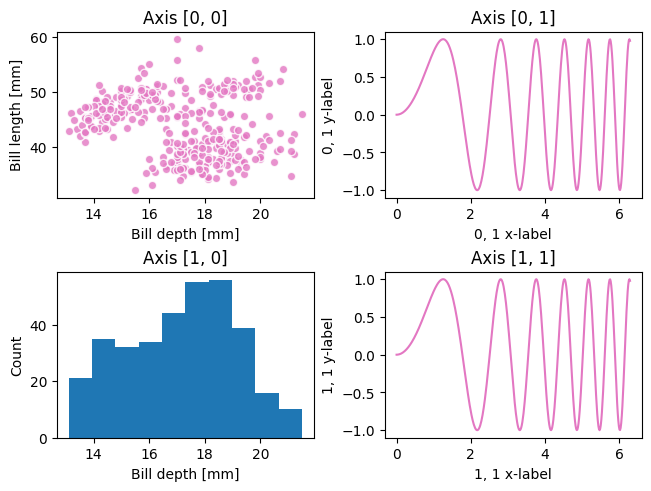

In [35]:
# what happens when we remove the following options:
# constrained_layout=True, sharex=False, sharey=False

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# Set up figure with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, constrained_layout=True, )

# we can create a scatter plot in one panel
axs[0, 0].scatter(data['bill_depth_mm'],
                  data['bill_length_mm'],
                  c='tab:pink', edgecolors="white", alpha=0.8)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 0].set(xlabel='Bill depth [mm]', ylabel='Bill length [mm]')

axs[0, 1].plot(x, y, 'tab:pink')
axs[0, 1].set_title('Axis [0, 1]')
axs[0, 1].set(xlabel='0, 1 x-label', ylabel='0, 1 y-label')

# we can create a histogram in another panel
axs[1, 0].hist(data['bill_depth_mm'])
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 0].set(xlabel='Bill depth [mm]', ylabel='Count')

axs[1, 1].plot(x, y, 'tab:pink')
axs[1, 1].set_title('Axis [1, 1]')
axs[1, 1].set(xlabel='1, 1 x-label', ylabel='1, 1 y-label')

[Text(0.5, 0, '1, 1 x-label'), Text(0, 0.5, '1, 1 y-label')]

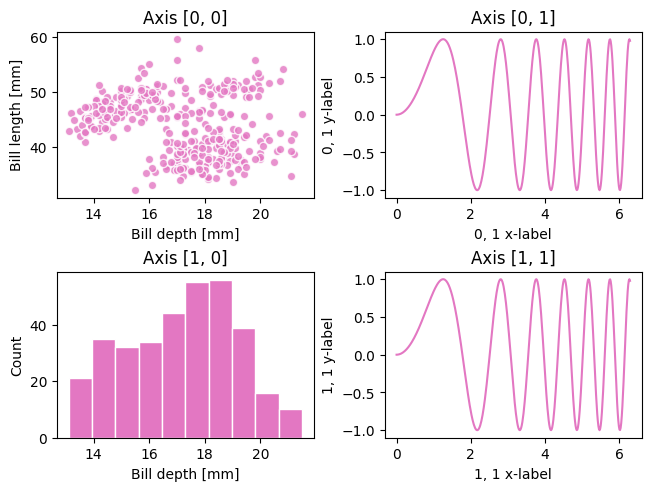

In [38]:

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# Set up figure with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, constrained_layout=True, )

# we can create a scatter plot in one panel
axs[0, 0].scatter(data['bill_depth_mm'],
                  data['bill_length_mm'],
                  c='tab:pink', edgecolors="white", alpha=0.8)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 0].set(xlabel='Bill depth [mm]', ylabel='Bill length [mm]')

axs[0, 1].plot(x, y, 'tab:pink')
axs[0, 1].set_title('Axis [0, 1]')
axs[0, 1].set(xlabel='0, 1 x-label', ylabel='0, 1 y-label')

# we can create a histogram in another panel
axs[1, 0].hist(data['bill_depth_mm'],
               histtype="bar", color='tab:pink', edgecolor="white")
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 0].set(xlabel='Bill depth [mm]', ylabel='Count')

axs[1, 1].plot(x, y, 'tab:pink')
axs[1, 1].set_title('Axis [1, 1]')
axs[1, 1].set(xlabel='1, 1 x-label', ylabel='1, 1 y-label')

[Text(0.5, 0, '1, 1 x-label'), Text(0, 0.5, '1, 1 y-label')]

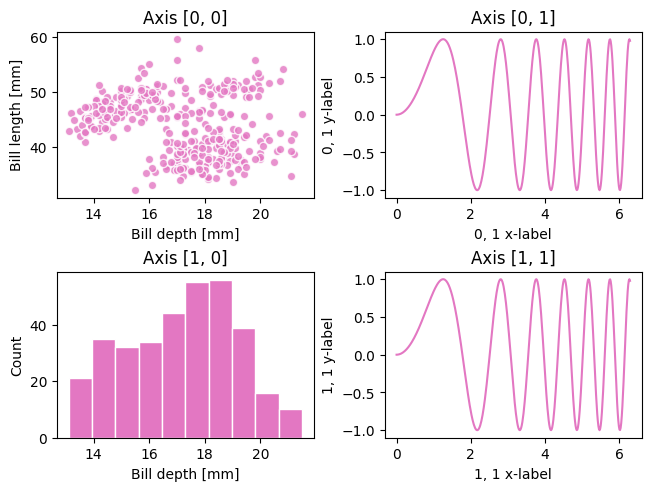

In [40]:
# lets align the x-axis on the two left-hand plots

# can be done by setting limits, or by sharing the x axis

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# Set up figure with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, constrained_layout=True, )

# we can create a scatter plot in one panel
axs[0, 0].scatter(data['bill_depth_mm'],
                  data['bill_length_mm'],
                  c='tab:pink', edgecolors="white", alpha=0.8)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 0].set(xlabel='Bill depth [mm]', ylabel='Bill length [mm]')

axs[0, 1].plot(x, y, 'tab:pink')
axs[0, 1].set_title('Axis [0, 1]')
axs[0, 1].set(xlabel='0, 1 x-label', ylabel='0, 1 y-label')

# share axis with axs[0, 0]
axs[1, 0].sharex(...)
# we can create a histogram in another panel
axs[1, 0].hist(data['bill_depth_mm'],
               histtype="bar", color='tab:pink', edgecolor="white",)
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 0].set(xlabel='Bill depth [mm]', ylabel='Count')

axs[1, 1].plot(x, y, 'tab:pink')
axs[1, 1].set_title('Axis [1, 1]')
axs[1, 1].set(xlabel='1, 1 x-label', ylabel='1, 1 y-label')

[Text(0.5, 0, '1, 1 x-label'), Text(0, 0.5, '1, 1 y-label')]

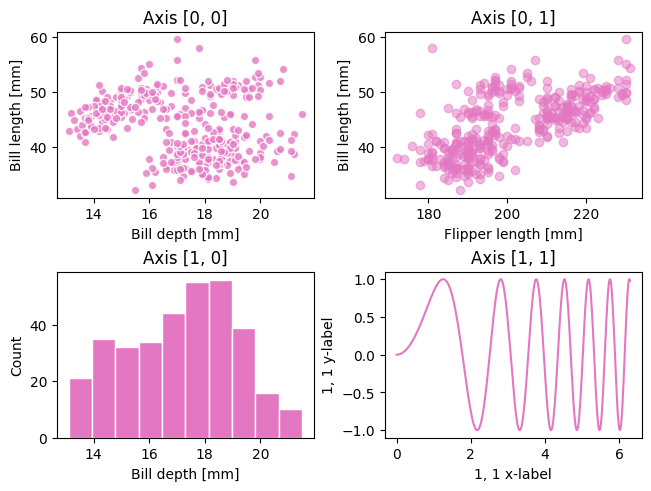

In [44]:
# lets align the x-axis on the two left-hand plots

# can be done by setting limits, or by sharing the x axis

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# Set up figure with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, constrained_layout=True, )

# we can create a scatter plot in one panel
axs[0, 0].scatter(data['bill_depth_mm'],
                  data['bill_length_mm'],
                  c='tab:pink', edgecolors="white", alpha=0.8)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 0].set(xlabel='Bill depth [mm]', ylabel='Bill length [mm]')

# create another scatter plot sharing y axis
axs[0, 1].sharey(...)
axs[0, 1].scatter(data['flipper_length_mm'],
               data['bill_length_mm'],
               c='tab:pink', alpha=0.5)
axs[0, 1].set_title('Axis [0, 1]')
axs[0, 1].set(xlabel='Flipper length [mm]', ylabel='Bill length [mm]')

# share axis with axs[0, 0]
axs[1, 0].sharex(...)
# we can create a histogram in another panel
axs[1, 0].hist(data['bill_depth_mm'],
               histtype="bar", color='tab:pink', edgecolor="white",)
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 0].set(xlabel='Bill depth [mm]', ylabel='Count')

axs[1, 1].plot(x, y, 'tab:pink')
axs[1, 1].set_title('Axis [1, 1]')
axs[1, 1].set(xlabel='1, 1 x-label', ylabel='1, 1 y-label')

We can also use seaborn functions within the gridded layout.

We'll use the [axes level functions](https://seaborn.pydata.org/tutorial/function_overview.html#axes-level-functions-make-self-contained-plots) available.

Let's start again with a fresh template.

[Text(0.5, 0, '1, 1 x-label'), Text(0, 0.5, '1, 1 y-label')]

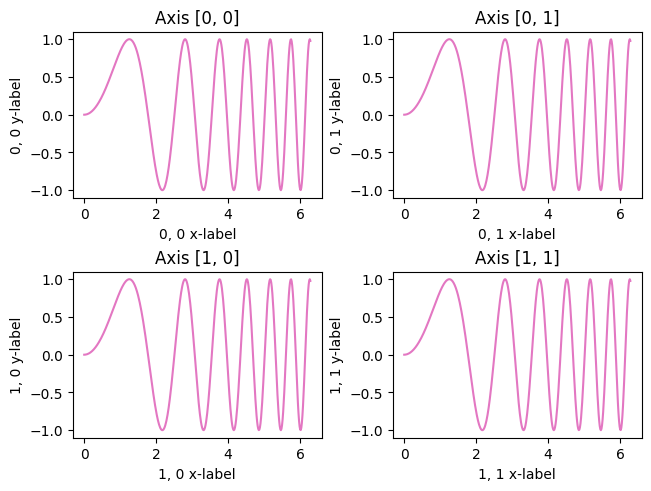

In [45]:
# copied across from https://quick-subplots.streamlit.app/

# n.b. I often keep the ax titles set until I am finished making the plot,
# even if I don't want to use them in the fional plot, to help me locate
# which part of the grid I'm working on

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# Set up figure with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, constrained_layout=True, sharex=False, sharey=False)

axs[0, 0].plot(x, y, 'tab:pink')
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 0].set(xlabel='0, 0 x-label', ylabel='0, 0 y-label')

axs[0, 1].plot(x, y, 'tab:pink')
axs[0, 1].set_title('Axis [0, 1]')
axs[0, 1].set(xlabel='0, 1 x-label', ylabel='0, 1 y-label')

axs[1, 0].plot(x, y, 'tab:pink')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 0].set(xlabel='1, 0 x-label', ylabel='1, 0 y-label')

axs[1, 1].plot(x, y, 'tab:pink')
axs[1, 1].set_title('Axis [1, 1]')
axs[1, 1].set(xlabel='1, 1 x-label', ylabel='1, 1 y-label')

[Text(0.5, 0, '1, 1 x-label'), Text(0, 0.5, '1, 1 y-label')]

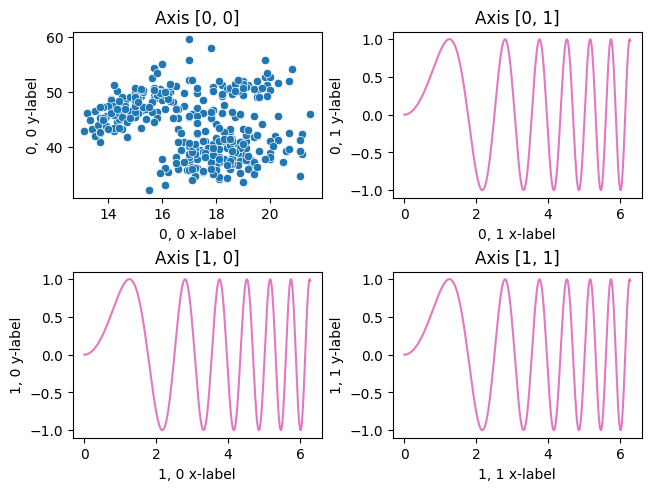

In [47]:
# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# Set up figure with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, constrained_layout=True, sharex=False, sharey=False)

# replace this line:
# axs[0, 0].plot(x, y, 'tab:pink')
# with this: sns.scatterplot

axs[0, 0].set_title('Axis [0, 0]')
axs[0, 0].set(xlabel='0, 0 x-label', ylabel='0, 0 y-label')

axs[0, 1].plot(x, y, 'tab:pink')
axs[0, 1].set_title('Axis [0, 1]')
axs[0, 1].set(xlabel='0, 1 x-label', ylabel='0, 1 y-label')

axs[1, 0].plot(x, y, 'tab:pink')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 0].set(xlabel='1, 0 x-label', ylabel='1, 0 y-label')

axs[1, 1].plot(x, y, 'tab:pink')
axs[1, 1].set_title('Axis [1, 1]')
axs[1, 1].set(xlabel='1, 1 x-label', ylabel='1, 1 y-label')

[Text(0.5, 0, '1, 1 x-label'), Text(0, 0.5, '1, 1 y-label')]

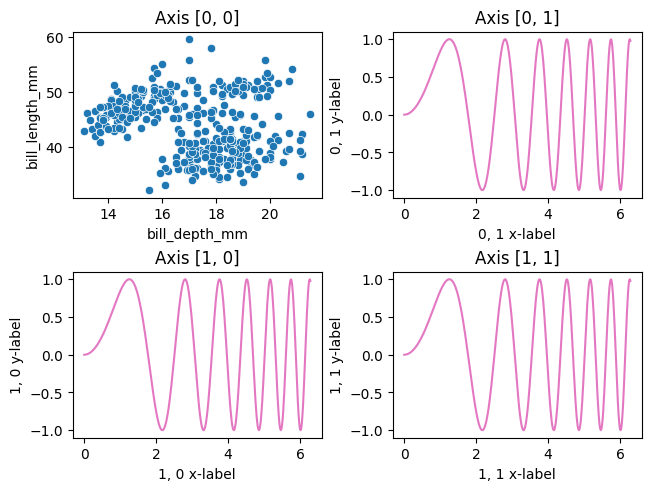

In [48]:
# What happens if you remove the x and y label settings?

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# Set up figure with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, constrained_layout=True, sharex=False, sharey=False)

# replace this line:
# axs[0, 0].plot(x, y, 'tab:pink')
# with this:
sns.scatterplot(...)
axs[0, 0].set_title('Axis [0, 0]')

# comment out this line:
axs[0, 0].set(xlabel='0, 0 x-label', ylabel='0, 0 y-label')

axs[0, 1].plot(x, y, 'tab:pink')
axs[0, 1].set_title('Axis [0, 1]')
axs[0, 1].set(xlabel='0, 1 x-label', ylabel='0, 1 y-label')

axs[1, 0].plot(x, y, 'tab:pink')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 0].set(xlabel='1, 0 x-label', ylabel='1, 0 y-label')

axs[1, 1].plot(x, y, 'tab:pink')
axs[1, 1].set_title('Axis [1, 1]')
axs[1, 1].set(xlabel='1, 1 x-label', ylabel='1, 1 y-label')

What theme is being used by default when you plot with seaborn and matplotlib combined like this?

# More advanced layout options

The matplotlib [gridspec](https://matplotlib.org/stable/api/_as_gen/matplotlib.gridspec.GridSpec.html) function provides very detailed control over the composition of our plots. Instead of using it directly, we are going to pass in some GridSpec keyword arguments to our subplots function ([see here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)).

Once again, let's start with a fresh plot uysing [this template](https://quick-subplots.streamlit.app/), except let's give ourselves more panels to work with.

[Text(0.5, 0, '2, 2 x-label'), Text(0, 0.5, '2, 2 y-label')]

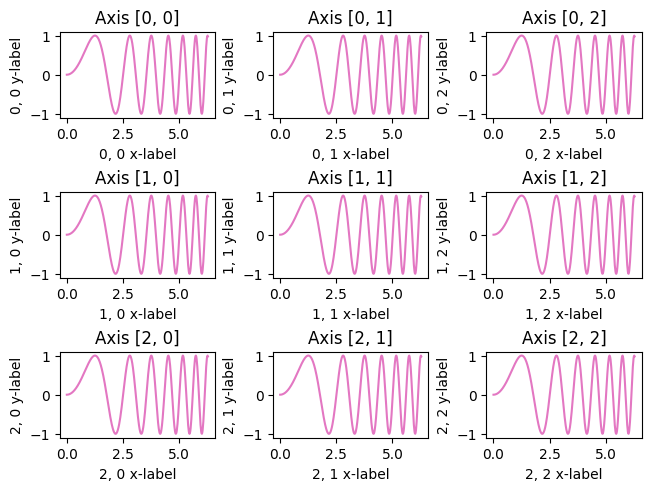

In [50]:

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# Set up figure with 3 rows and 3 columns
fig, axs = plt.subplots(3, 3, constrained_layout=True, sharex=False, sharey=False)

axs[0, 0].plot(x, y, 'tab:pink')
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 0].set(xlabel='0, 0 x-label', ylabel='0, 0 y-label')

axs[0, 1].plot(x, y, 'tab:pink')
axs[0, 1].set_title('Axis [0, 1]')
axs[0, 1].set(xlabel='0, 1 x-label', ylabel='0, 1 y-label')

axs[0, 2].plot(x, y, 'tab:pink')
axs[0, 2].set_title('Axis [0, 2]')
axs[0, 2].set(xlabel='0, 2 x-label', ylabel='0, 2 y-label')

axs[1, 0].plot(x, y, 'tab:pink')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 0].set(xlabel='1, 0 x-label', ylabel='1, 0 y-label')

axs[1, 1].plot(x, y, 'tab:pink')
axs[1, 1].set_title('Axis [1, 1]')
axs[1, 1].set(xlabel='1, 1 x-label', ylabel='1, 1 y-label')

axs[1, 2].plot(x, y, 'tab:pink')
axs[1, 2].set_title('Axis [1, 2]')
axs[1, 2].set(xlabel='1, 2 x-label', ylabel='1, 2 y-label')

axs[2, 0].plot(x, y, 'tab:pink')
axs[2, 0].set_title('Axis [2, 0]')
axs[2, 0].set(xlabel='2, 0 x-label', ylabel='2, 0 y-label')

axs[2, 1].plot(x, y, 'tab:pink')
axs[2, 1].set_title('Axis [2, 1]')
axs[2, 1].set(xlabel='2, 1 x-label', ylabel='2, 1 y-label')

axs[2, 2].plot(x, y, 'tab:pink')
axs[2, 2].set_title('Axis [2, 2]')
axs[2, 2].set(xlabel='2, 2 x-label', ylabel='2, 2 y-label')


[Text(0.5, 0, '2, 2 x-label'), Text(0, 0.5, '2, 2 y-label')]

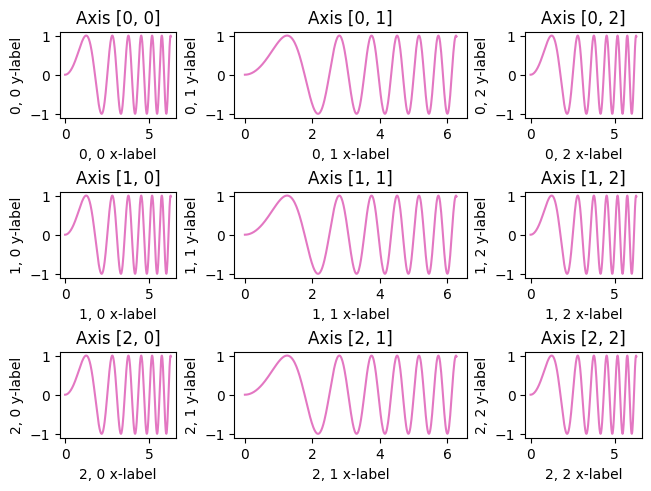

In [51]:

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# Set up figure with 3 rows and 3 columns
# let's add gridspec arguments
fig, axs = plt.subplots(3, 3, constrained_layout=True, sharex=False, sharey=False,
                        gridspec_kw={
                            "width_ratios": [2, 4, 2]
                        })

axs[0, 0].plot(x, y, 'tab:pink')
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 0].set(xlabel='0, 0 x-label', ylabel='0, 0 y-label')

axs[0, 1].plot(x, y, 'tab:pink')
axs[0, 1].set_title('Axis [0, 1]')
axs[0, 1].set(xlabel='0, 1 x-label', ylabel='0, 1 y-label')

axs[0, 2].plot(x, y, 'tab:pink')
axs[0, 2].set_title('Axis [0, 2]')
axs[0, 2].set(xlabel='0, 2 x-label', ylabel='0, 2 y-label')

axs[1, 0].plot(x, y, 'tab:pink')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 0].set(xlabel='1, 0 x-label', ylabel='1, 0 y-label')

axs[1, 1].plot(x, y, 'tab:pink')
axs[1, 1].set_title('Axis [1, 1]')
axs[1, 1].set(xlabel='1, 1 x-label', ylabel='1, 1 y-label')

axs[1, 2].plot(x, y, 'tab:pink')
axs[1, 2].set_title('Axis [1, 2]')
axs[1, 2].set(xlabel='1, 2 x-label', ylabel='1, 2 y-label')

axs[2, 0].plot(x, y, 'tab:pink')
axs[2, 0].set_title('Axis [2, 0]')
axs[2, 0].set(xlabel='2, 0 x-label', ylabel='2, 0 y-label')

axs[2, 1].plot(x, y, 'tab:pink')
axs[2, 1].set_title('Axis [2, 1]')
axs[2, 1].set(xlabel='2, 1 x-label', ylabel='2, 1 y-label')

axs[2, 2].plot(x, y, 'tab:pink')
axs[2, 2].set_title('Axis [2, 2]')
axs[2, 2].set(xlabel='2, 2 x-label', ylabel='2, 2 y-label')

[Text(0.5, 0, '2, 2 x-label'), Text(0, 0.5, '2, 2 y-label')]

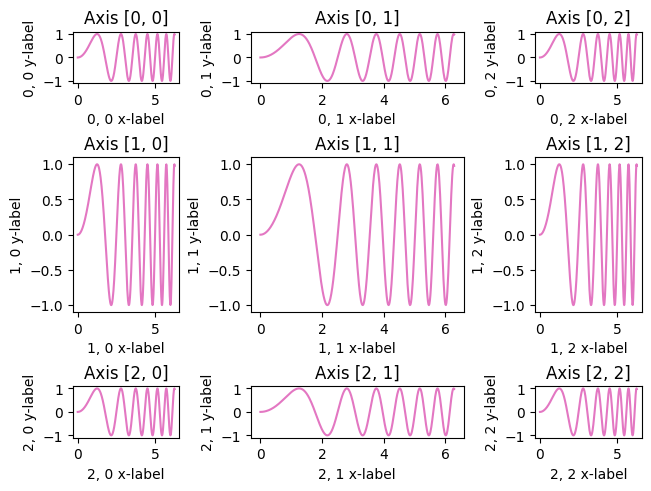

In [52]:

# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# Set up figure with 3 rows and 3 columns
# let's add gridspec arguments
fig, axs = plt.subplots(3, 3, constrained_layout=True, sharex=False, sharey=False,
                        gridspec_kw={
                            "width_ratios": [2, 4, 2],
                            "height_ratios":[1, 3, 1]
                        })

axs[0, 0].plot(x, y, 'tab:pink')
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 0].set(xlabel='0, 0 x-label', ylabel='0, 0 y-label')

axs[0, 1].plot(x, y, 'tab:pink')
axs[0, 1].set_title('Axis [0, 1]')
axs[0, 1].set(xlabel='0, 1 x-label', ylabel='0, 1 y-label')

axs[0, 2].plot(x, y, 'tab:pink')
axs[0, 2].set_title('Axis [0, 2]')
axs[0, 2].set(xlabel='0, 2 x-label', ylabel='0, 2 y-label')

axs[1, 0].plot(x, y, 'tab:pink')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 0].set(xlabel='1, 0 x-label', ylabel='1, 0 y-label')

axs[1, 1].plot(x, y, 'tab:pink')
axs[1, 1].set_title('Axis [1, 1]')
axs[1, 1].set(xlabel='1, 1 x-label', ylabel='1, 1 y-label')

axs[1, 2].plot(x, y, 'tab:pink')
axs[1, 2].set_title('Axis [1, 2]')
axs[1, 2].set(xlabel='1, 2 x-label', ylabel='1, 2 y-label')

axs[2, 0].plot(x, y, 'tab:pink')
axs[2, 0].set_title('Axis [2, 0]')
axs[2, 0].set(xlabel='2, 0 x-label', ylabel='2, 0 y-label')

axs[2, 1].plot(x, y, 'tab:pink')
axs[2, 1].set_title('Axis [2, 1]')
axs[2, 1].set(xlabel='2, 1 x-label', ylabel='2, 1 y-label')

axs[2, 2].plot(x, y, 'tab:pink')
axs[2, 2].set_title('Axis [2, 2]')
axs[2, 2].set(xlabel='2, 2 x-label', ylabel='2, 2 y-label')

For more fine-grained control, please see the [GridSpec examples](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/gridspec_multicolumn.html#sphx-glr-gallery-subplots-axes-and-figures-gridspec-multicolumn-py).

The [Proplot](https://proplot.readthedocs.io/en/latest/basics.html#Multiple-subplots) library also has some nice multi-panelled gridding functionality.

The R/ggplot-inspired libraries have great functionality when it comes to faceting your data - see [Lets-Plot](https://lets-plot.org/) and [Plotnine](https://plotnine.org/).